In [77]:
!pip install tensorflow-gpu==2.0.0-alpha0
!pip install tfp-nightly==0.7.0.dev20190519

In [78]:
#load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras import optimizers

tf.__version__



import tensorflow_probability as tfp
tfd = tfp.distributions

tfp.__version__

'0.7.0-dev20190519'

In [0]:
def create_sine_data(n = 300):
    np.random.seed(32)
    n = 300
    x = np.linspace(0,1*2*np.pi,n)
    y1 = 3*np.sin(x)
    y1 = np.concatenate((np.zeros(60), y1+np.random.normal(0,0.15*np.abs(y1),n),np.zeros(60)))
    x=np.concatenate((np.linspace(-3,0,60),np.linspace(0,3*2*np.pi,n),np.linspace(3*2*np.pi,3*2*np.pi+3,60)))
    y2 = 0.1*x+1
    y=y1+y2
    return x,y

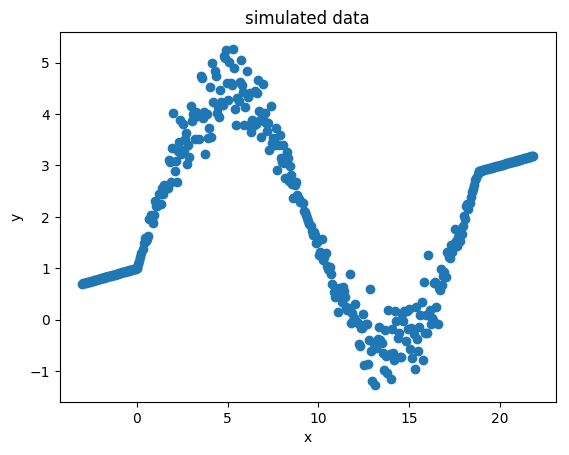

In [80]:

## use custom function to simulate some data ## use  
x,y = create_sine_data(n=300) #A
plt.scatter(x=x,y=y,marker='o')
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
n=len(x)

In [0]:
## # set up a NN with 3 hidden layers and only one output node 
## # This allows that the mean of the CPD depends non-linearly on x
## # and the standard deviation of the CPD is constant and not modeled
## model = Sequential()
## model.add(Dense(20, activation='relu',
##                 batch_input_shape=(None, 1)))
## model.add(Dense(50, activation='relu'))
## model.add(Dense(20, activation='relu'))
## model.add(Dense(1, activation='linear'))
## model.compile(loss='mean_squared_error',optimizer="adam")

In [0]:

#negloglik = lambda y, rv_y: -rv_y.log_prob(y)#define negative loglike#neglog 
def negloglik(y,rv_y):
  return -rv_y.log_prob(y)

In [89]:
#Build model.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,activation="relu",input_shape=(1,)))
model.add(tf.keras.layers.Dense(50,activation="relu",))
model.add(tf.keras.layers.Dense(20,activation="relu",))
model.add(tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[:, 0:1],
                                                              scale=1e-3 + tf.math.softplus(0.05 * t[:,1:2]))))
#model.add(tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[:, 0:1],
  #                                                            scale=1e-3 + tf.math.exp( t[:,1:2]))))

### neu ist das softplus nun wird var mit modelliert)
model.summary()
# Do inference.
model.compile(optimizer=tf.optimizers.Adam(), loss=negloglik)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_55 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_56 (Dense)             (None, 20)                1020      
_________________________________________________________________
distribution_lambda_18 (Dist ((None, 1), (None, 1))    0         
Total params: 2,110
Trainable params: 2,110
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(x, y, epochs=2000,batch_size=32,verbose=0)


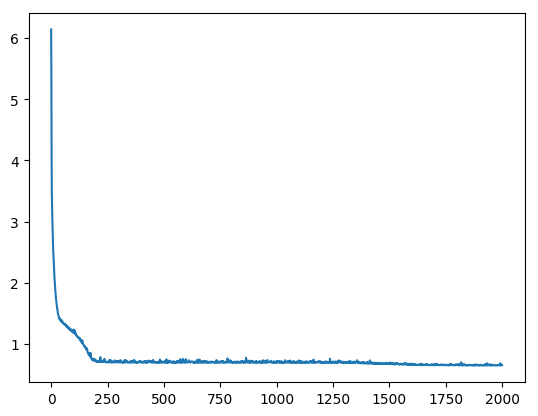

In [91]:
plt.plot(history.history["loss"])

In [94]:
model.evaluate(x,y)

420/420 [==============================] - 0s 219us/sample - loss: 0.6490


0.6489505966504415

In [95]:
x_tst=x
x_tst=x_tst.reshape((len(x_tst),1))
x_tst.shape

(420, 1)

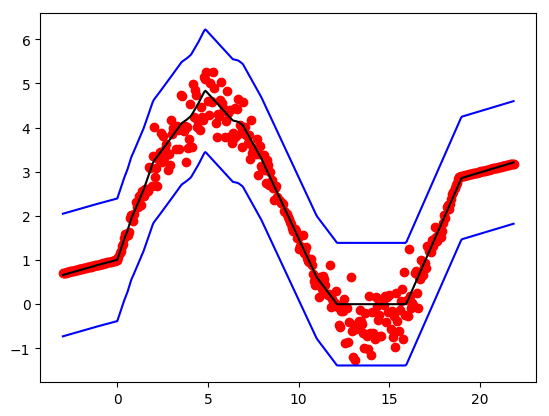

In [96]:

plt.scatter(x,y,color="red")  #observerd #observe 
#for i in range(0,3):
 # plt.scatter(x_tst,model(x_tst).sample())
plt.plot(x_tst,model(x_tst).mean(),color="black")
plt.plot(x_tst,model(x_tst).mean()+2*model(x_tst).stddev(),color="blue")
plt.plot(x_tst,model(x_tst).mean()-2*model(x_tst).stddev(),color="blue")

In [99]:
#Build model.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,activation="sigmoid",input_shape=(1,)))
#model.add(tf.keras.layers.Dense(50,activation="sigmoid",))
model.add(tf.keras.layers.Dense(50,activation="sigmoid",))

model.add(tf.keras.layers.Dense(20,activation="sigmoid",))
model.add(tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[:, 0:1],
                                                             scale=1e-3 + tf.math.softplus(0.05 * t[:,1:2]))))

#model.add(tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[:, 0:1],
             #                                                 scale=1e-3 + tf.math.exp( t[:,1:2]))))
### neu ist das softplus nun wird var mit modelliert)
model.summary()
# Do inference.
model.compile(optimizer=tf.optimizers.Adam(), loss=negloglik)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_61 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_62 (Dense)             (None, 20)                1020      
_________________________________________________________________
distribution_lambda_20 (Dist ((None, 1), (None, 1))    0         
Total params: 2,110
Trainable params: 2,110
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(x, y, epochs=2000,batch_size=32,verbose=0)

## stuck in a local opt

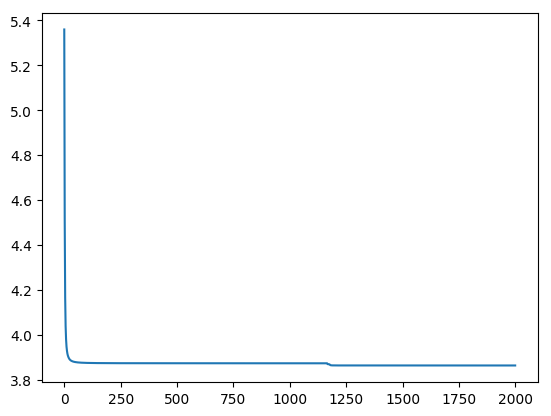

In [101]:
plt.plot(history.history["loss"])

In [102]:
model.evaluate(x,y)

420/420 [==============================] - 0s 206us/sample - loss: 3.8631


3.8631389163789294

In [103]:
x_tst=x
x_tst=x_tst.reshape((len(x_tst),1))
x_tst.shape

(420, 1)

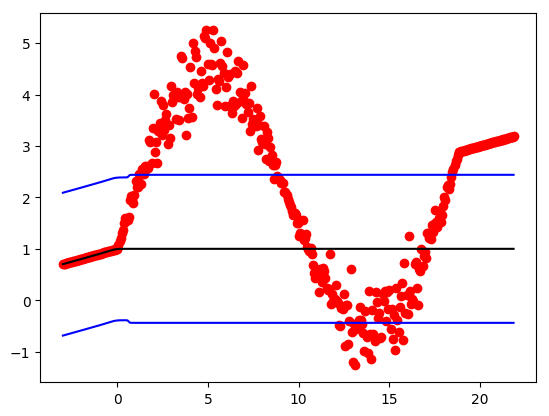

In [104]:

plt.scatter(x,y,color="red")  #observerd #observe 
#for i in range(0,3):
 # plt.scatter(x_tst,model(x_tst).sample())
plt.plot(x_tst,model(x_tst).mean(),color="black")
plt.plot(x_tst,model(x_tst).mean()+2*model(x_tst).stddev(),color="blue")
plt.plot(x_tst,model(x_tst).mean()-2*model(x_tst).stddev(),color="blue")

In [133]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


kernel_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (x.shape[0] * 1.0)
bias_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (x.shape[0] * 1.0)


# This returns a tensor
inputs = Input(shape=(1,))

# a layer instance is callable on a tensor, and returns a tensor
xx = tfp.layers.DenseFlipout(20,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn,activation="relu")(inputs)
xx = tfp.layers.DenseFlipout(50,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
xx = tfp.layers.DenseFlipout(20,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
xx = tfp.layers.DenseFlipout(2,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn)(xx)

predictions = tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[:, 0:1],scale=1e-3 + tf.math.softplus(0.05 * t[:,1:2])))(xx)


model = Model(inputs=inputs, outputs=predictions)
model.summary()
# Do inference.
model.compile(optimizer=tf.optimizers.Adam(), loss=negloglik)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_flipout_12 (DenseFlipo (None, 20)                80        
_________________________________________________________________
dense_flipout_13 (DenseFlipo (None, 50)                2100      
_________________________________________________________________
dense_flipout_14 (DenseFlipo (None, 20)                2040      
_________________________________________________________________
dense_flipout_15 (DenseFlipo (None, 2)                 84        
_________________________________________________________________
distribution_lambda_24 (Dist ((None, 1), (None, 1))    0         
Total params: 4,304
Trainable params: 4,304
Non-trainable params: 0
_________________________________________________________

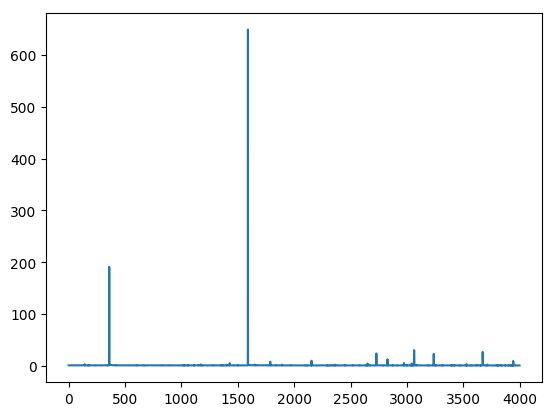

In [143]:
history=model.fit(x, y,batch_size=32 ,epochs=4000, verbose=0)
#man muss ewig trainieren!!!
plt.plot(history.history['loss'])

In [0]:
model_mean = tf.keras.models.Model(inputs=inputs, outputs=predictions.mean())
model_std = tf.keras.models.Model(inputs=inputs, outputs=predictions.stddev())

In [0]:
from tqdm import tqdm_notebook as tqdm

In [0]:
x_tst=np.arange(-20,40,0.1)
x_tst=x_tst.reshape((len(x_tst),1))

In [147]:
n=500
n_preds=np.zeros((n,len(x_tst)))
for i in tqdm(range(0,n)):
  n_preds[i,:]=np.reshape(model_mean.predict(x_tst),len(x_tst))

In [148]:
n=500
n_preds_std=np.zeros((n,len(x_tst)))
for i in tqdm(range(0,n)):
  n_preds_std[i,:]=np.reshape(model_std.predict(x_tst),len(x_tst))

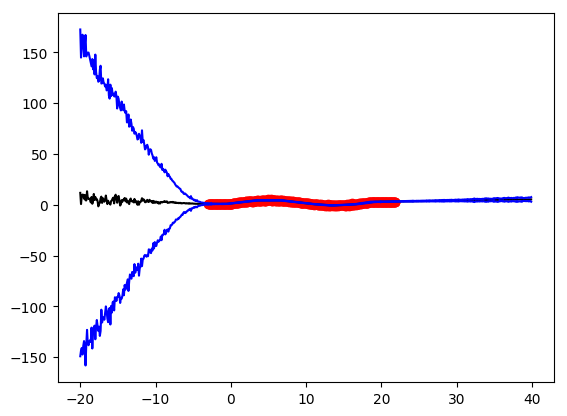

In [149]:
plt.scatter(x,y,color="red") #observerd 
plt.plot(x_tst,np.mean(n_preds,axis=0),color="black")
plt.plot(x_tst,np.mean(n_preds,axis=0)+2*np.std(n_preds,axis=0),color="blue")
plt.plot(x_tst,np.mean(n_preds,axis=0)-2*np.std(n_preds,axis=0),color="blue")


(-5, 10)

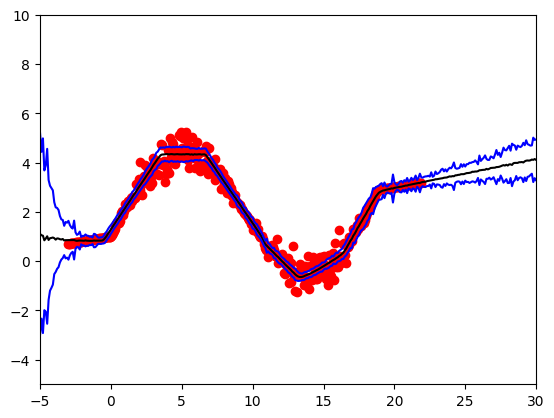

In [152]:
plt.scatter(x,y,color="red") #observerd 
plt.plot(x_tst,np.mean(n_preds,axis=0),color="black")
plt.plot(x_tst,np.mean(n_preds,axis=0)+2*np.std(n_preds,axis=0),color="blue")
plt.plot(x_tst,np.mean(n_preds,axis=0)-2*np.std(n_preds,axis=0),color="blue")
plt.xlim([-5,30])
plt.ylim([-5,10])